In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting whitegrid
sns.set_style('whitegrid')

# Importing data
data=pd.read_csv("E:/Project_1/DATA/retail_sales_dataset_raw.csv")

# Seeing first 5 raws
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
# Data cleaning 
clean_data=data[
    (data['Quantity']>0)&
    (data['Price per Unit']>0)&
    (data['Total Amount']>0)&
    (data['Customer ID'].notna())
].copy()

# Cleaning names of columns
clean_data.columns=[
    'transaction_id', 'order_date', 'customer_id', 'gender', 'age',
    'product_category', 'quantity', 'price_per_unit', 'total_amount'
]

# Transforming order_date to datetime
clean_data['order_date']=pd.to_datetime(clean_data['order_date'])

In [5]:
# Total Sales
total_sales=clean_data['total_amount'].sum()

# Total Orders
total_orders=clean_data['transaction_id'].nunique()

# Avg Order Value
avg_order_value=total_sales/total_orders

# Top 5 Products
top_products=clean_data.groupby('product_category')['total_amount'].sum().sort_values(ascending=False).head(5)

# Monthly Sales & MoM Growth
monthly_sales=clean_data.groupby(clean_data['order_date'].dt.to_period('M'))['total_amount'].sum().reset_index()
monthly_sales['month']=monthly_sales['order_date'].dt.to_timestamp()
monthly_sales['prev_month']=monthly_sales['total_amount'].shift(1)
monthly_sales['mom_growth_pct']=((monthly_sales['total_amount']-monthly_sales['prev_month'])/monthly_sales['prev_month']*100).round(2)

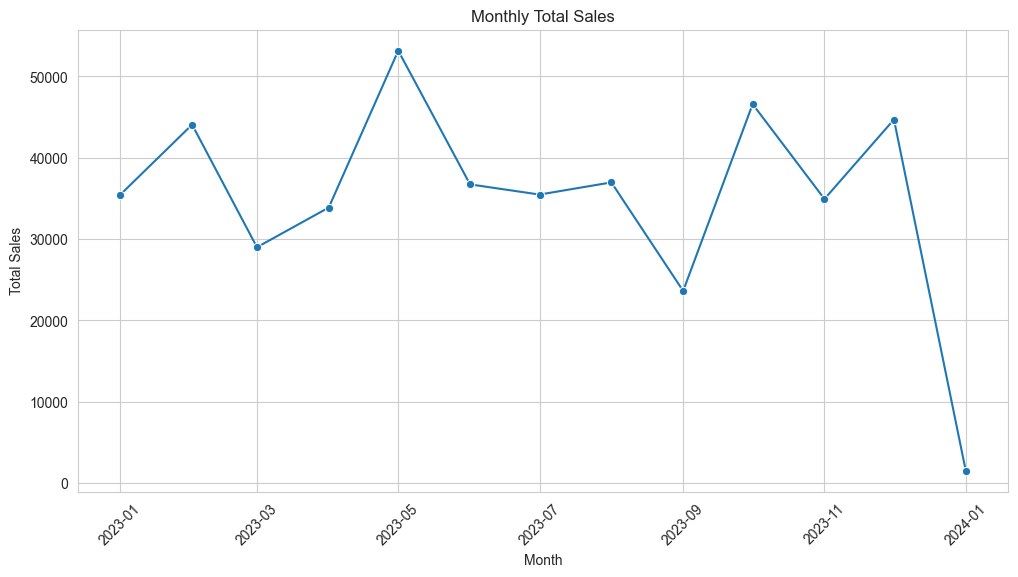

In [6]:
# Total Sales by month
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='total_amount', marker='o')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

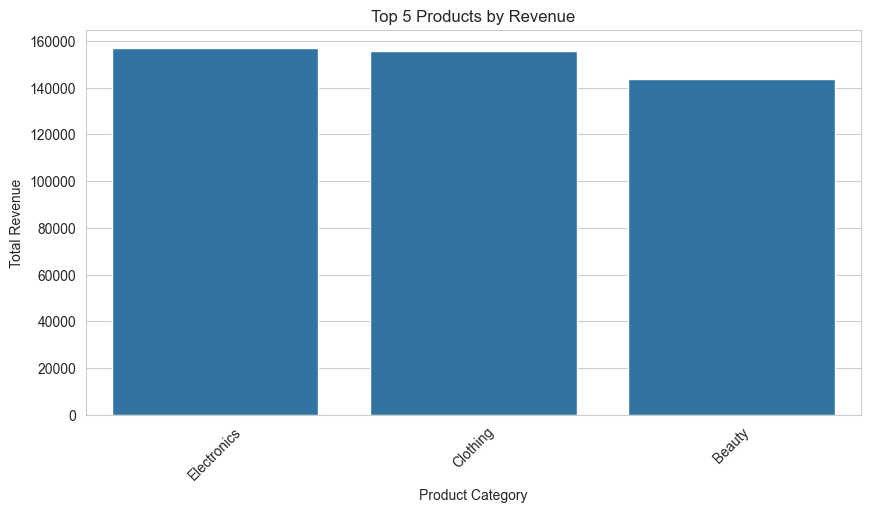

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Products by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Product Category")
plt.xticks(rotation=45)
plt.show()